In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
#read file csv
df=pd.read_csv("C:/Users/Dell/Downloads/Data Science Track/weatherAUS.csv/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [25]:
df.describe(include='all').transpose()


,count,mean,min,25%,50%,75%,max,std
Date,145460,2013-04-04 21:08:51.907053568,2007-11-01 00:00:00,2011-01-11 00:00:00,2013-06-02 00:00:00,2015-06-14 00:00:00,2017-06-25 00:00:00,NaN
Location,145460.0,23.793524,0.0,11.0,24.0,36.0,48.0,14.228687
MinTemp,145460.0,12.192053,-8.5,7.7,12.0,16.8,33.9,6.36578
MaxTemp,145460.0,23.215962,-4.8,18.0,22.6,28.2,48.1,7.088358
Rainfall,145460.0,2.30799,0.0,0.0,0.0,0.6,371.0,8.389771
WindGustDir,145460.0,8.0936,0.0,4.0,9.0,13.0,15.0,4.69411
WindGustSpeed,145460.0,39.962189,6.0,31.0,39.0,46.0,135.0,13.120931
WindDir9am,145460.0,6.999526,0.0,3.0,7.0,11.0,15.0,4.515839
WindDir3pm,145460.0,7.798852,0.0,4.0,8.0,12.0,15.0,4.538135
WindSpeed9am,145460.0,14.030751,0.0,7.0,13.0,19.0,130.0,8.861796


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
df.duplicated().sum()

0

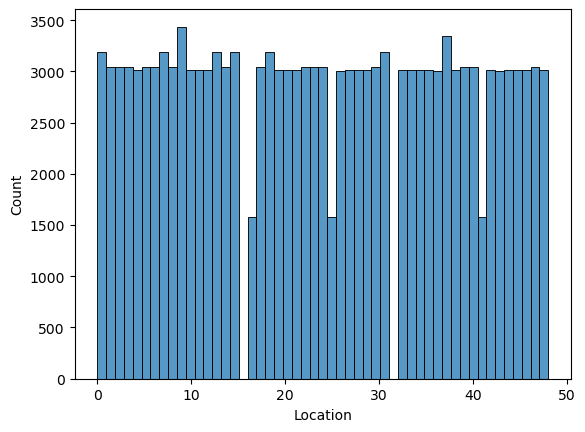

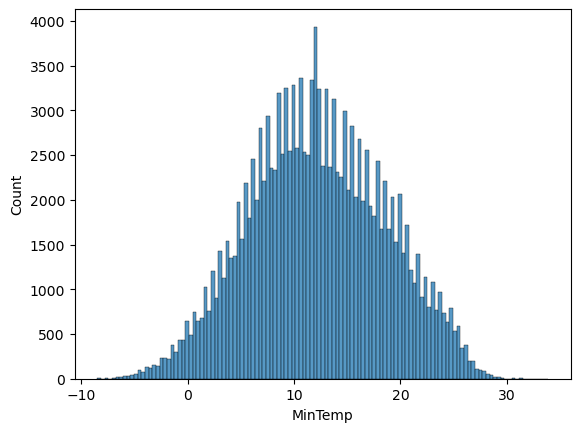

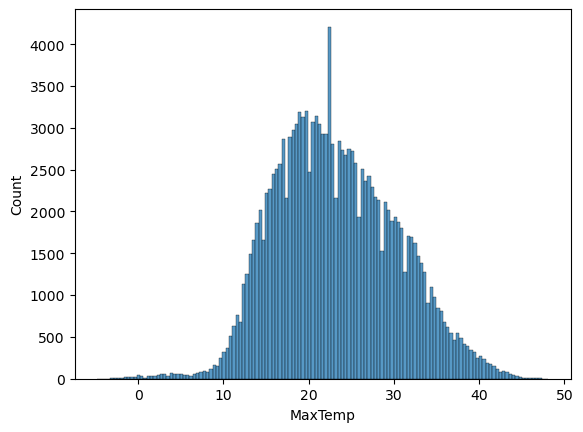

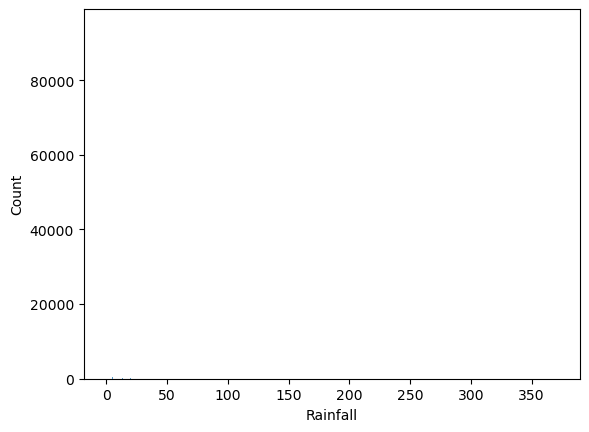

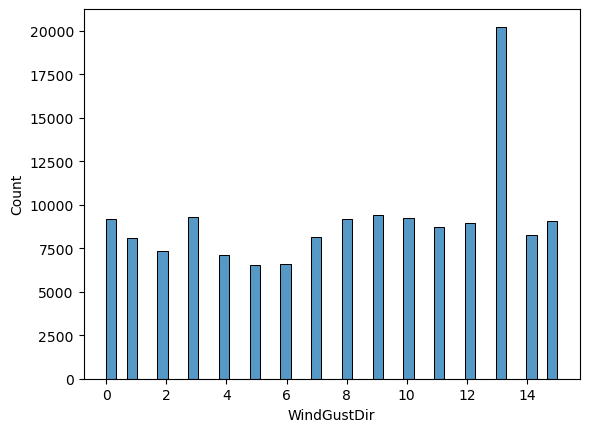

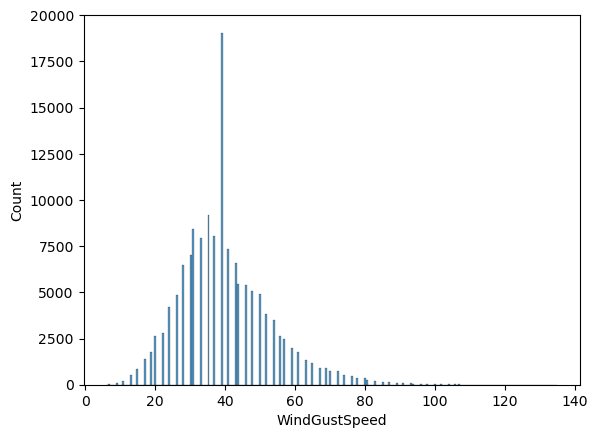

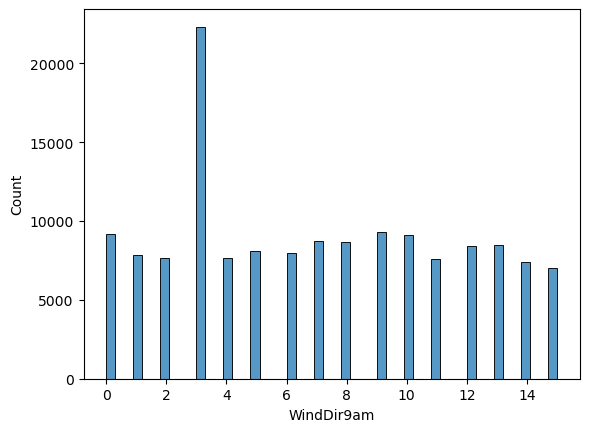

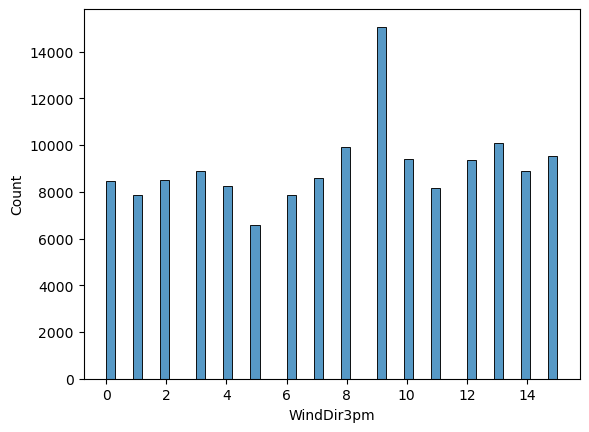

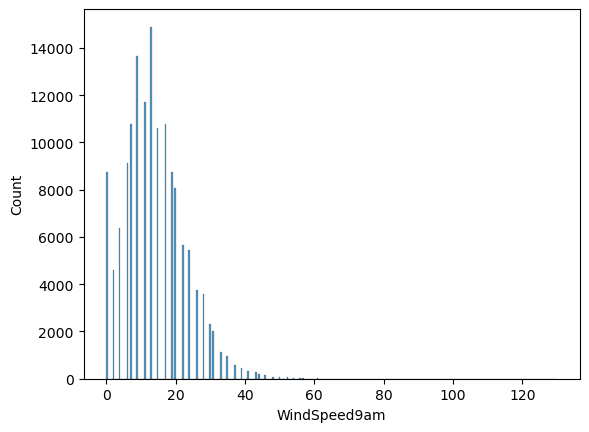

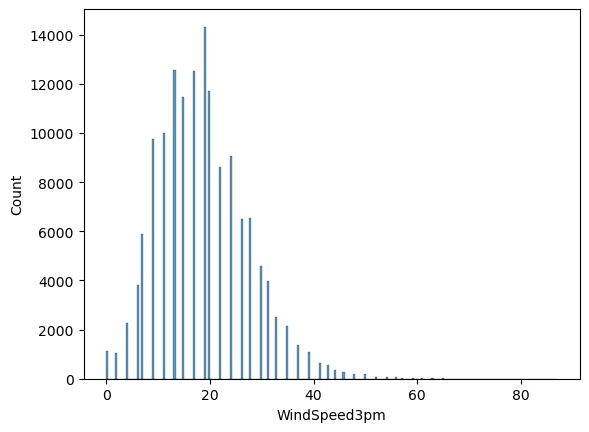

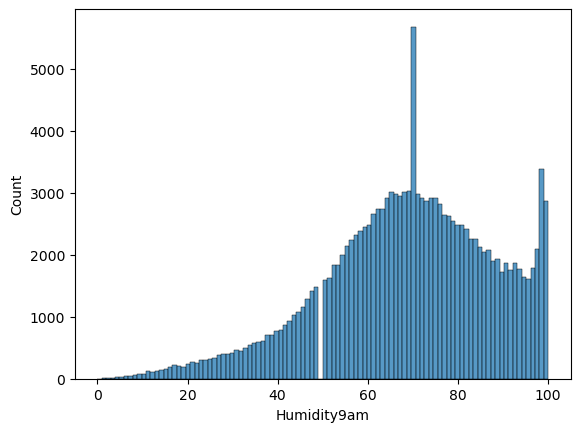

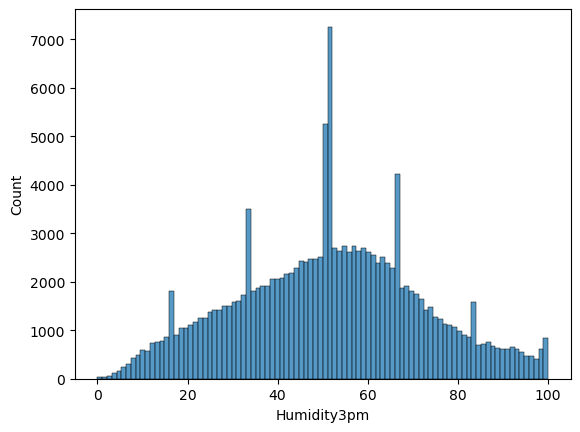

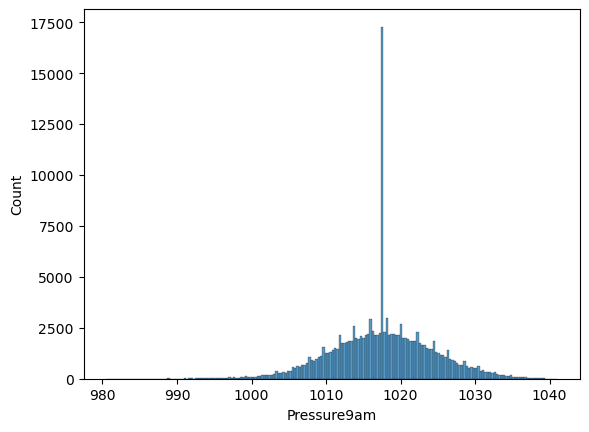

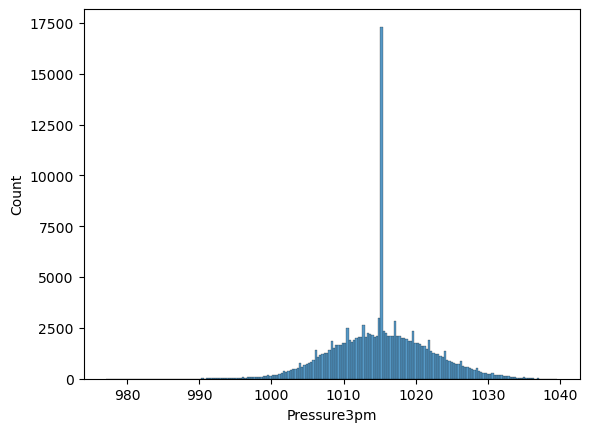

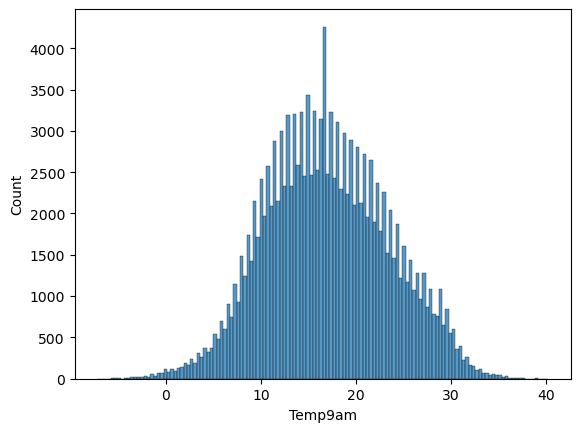

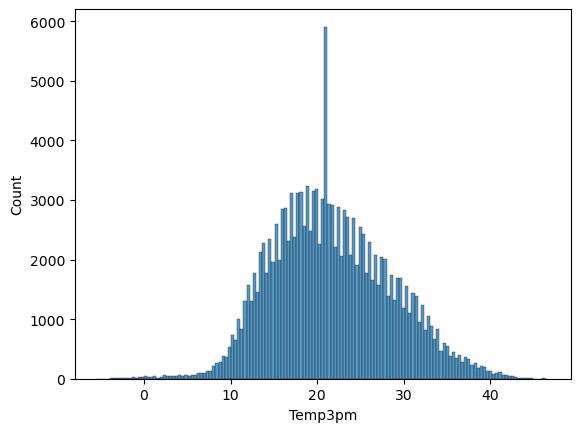

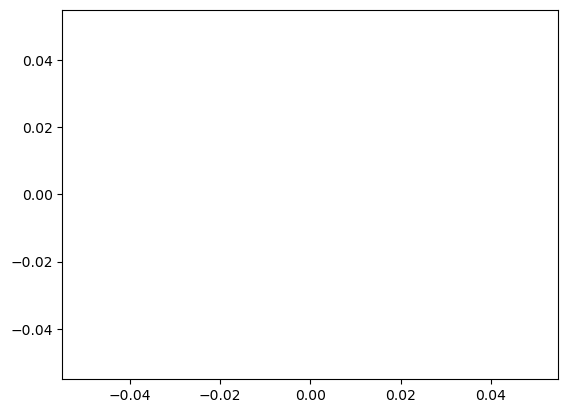

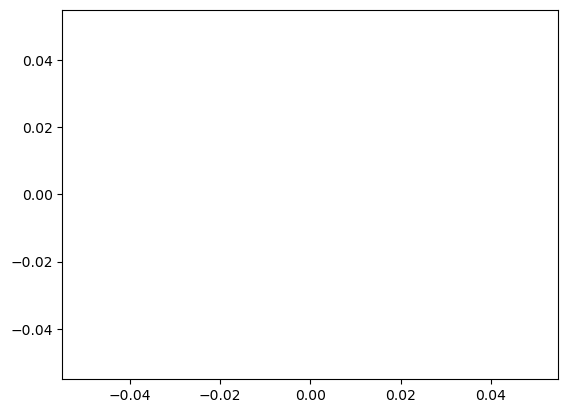

In [ ]:
#Histogram
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

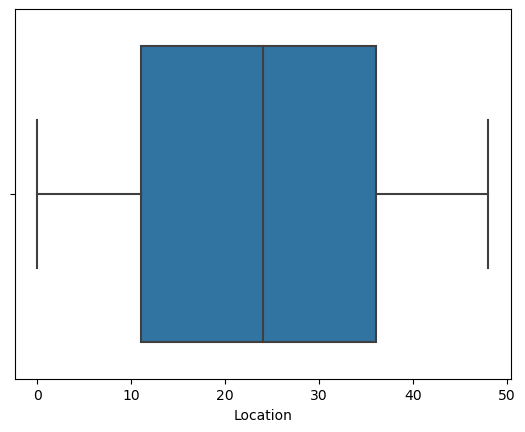

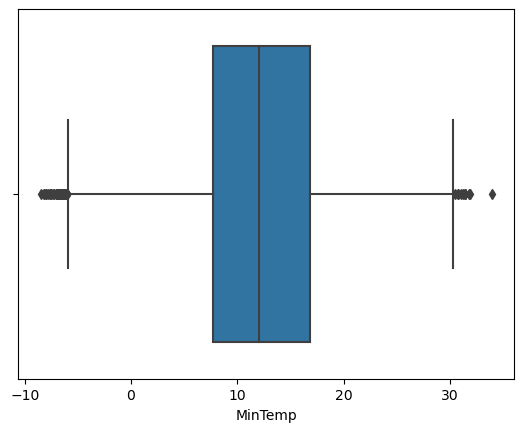

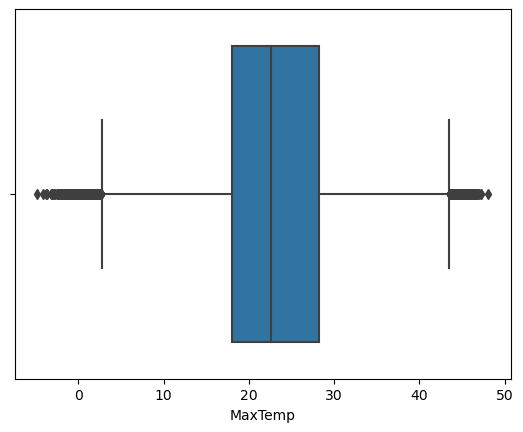

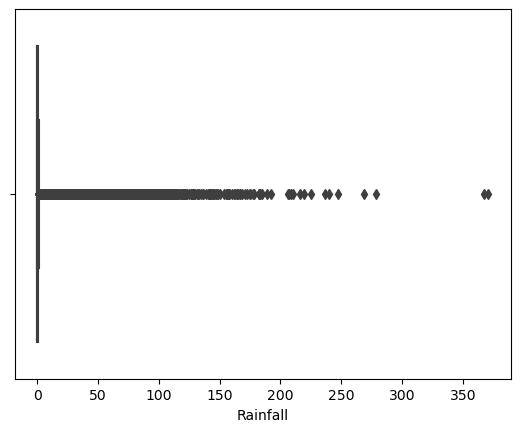

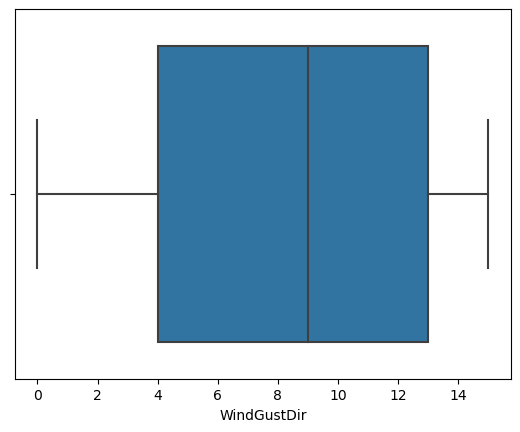

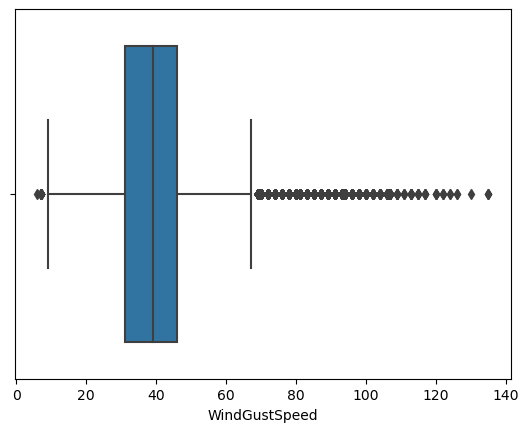

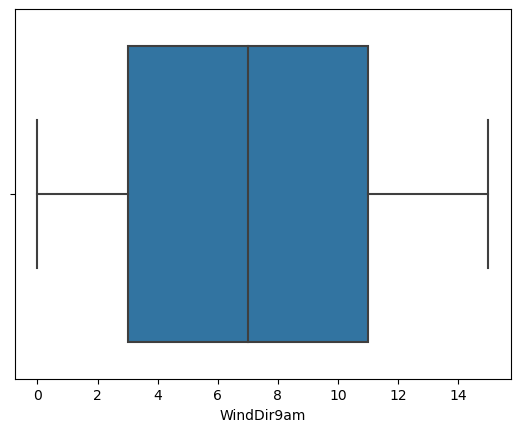

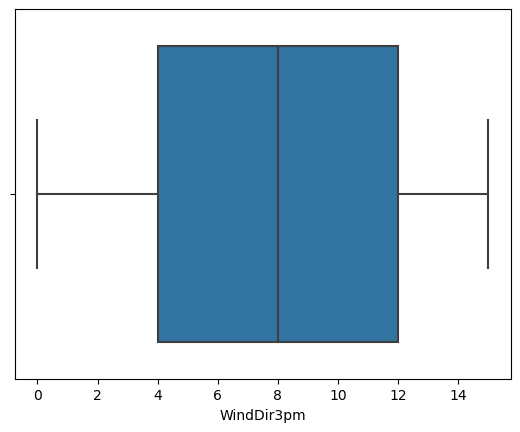

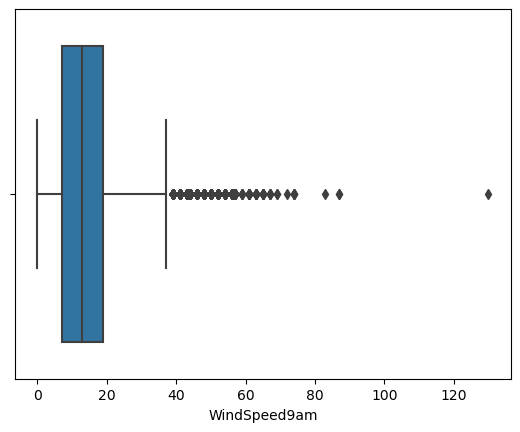

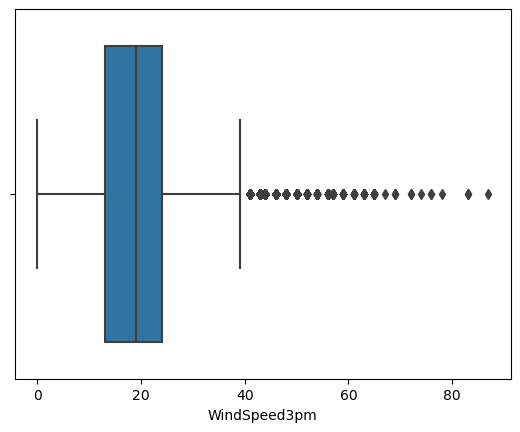

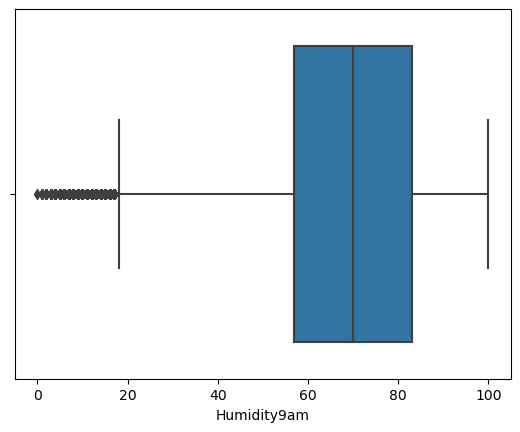

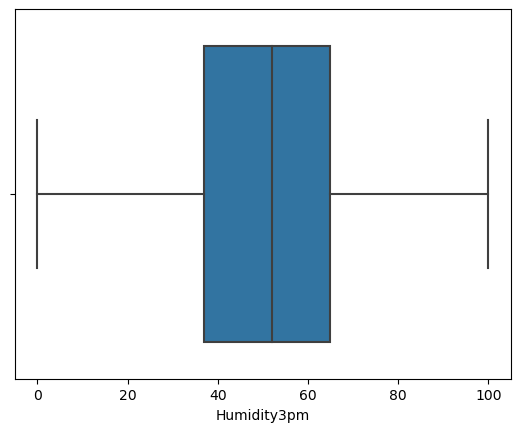

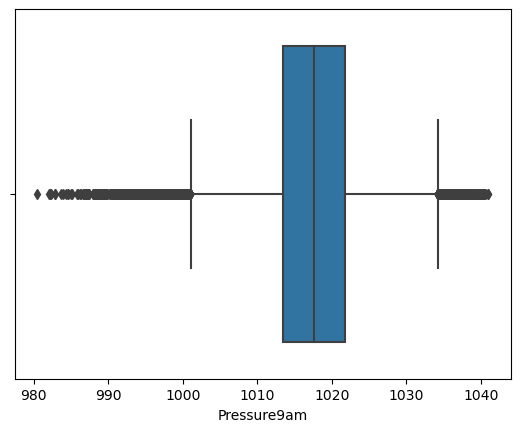

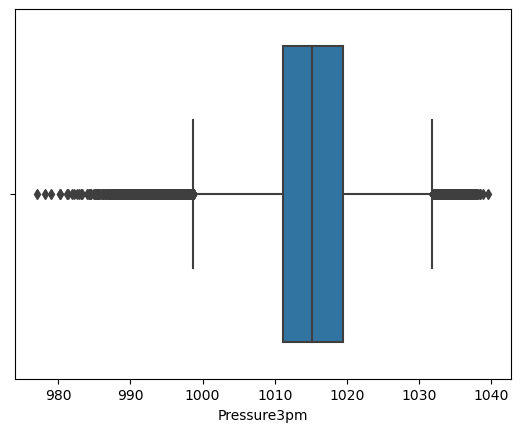

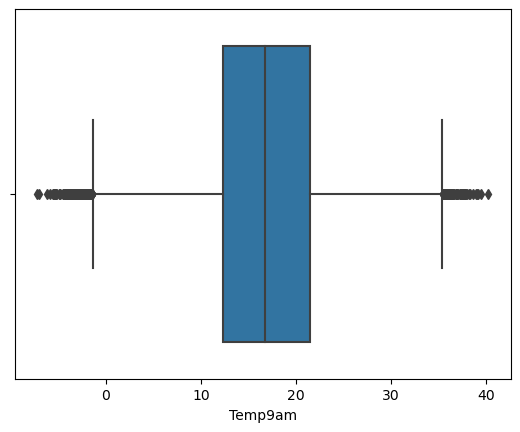

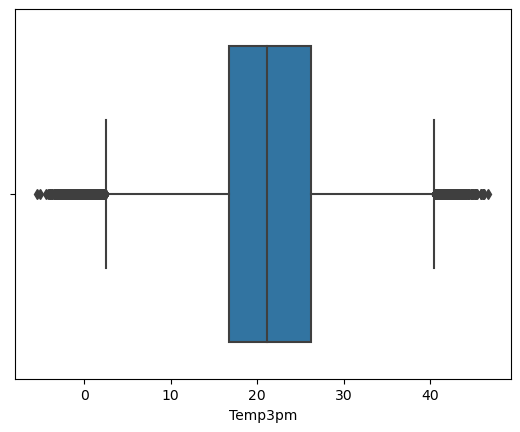

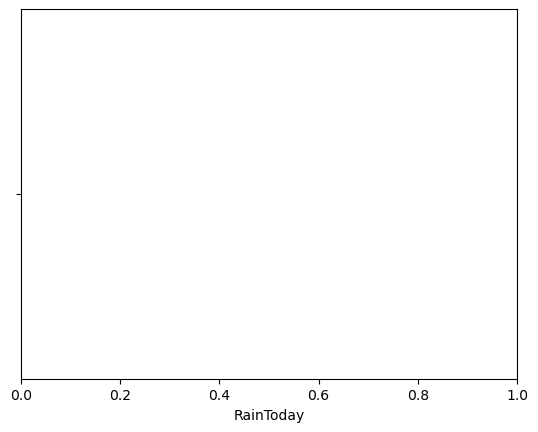

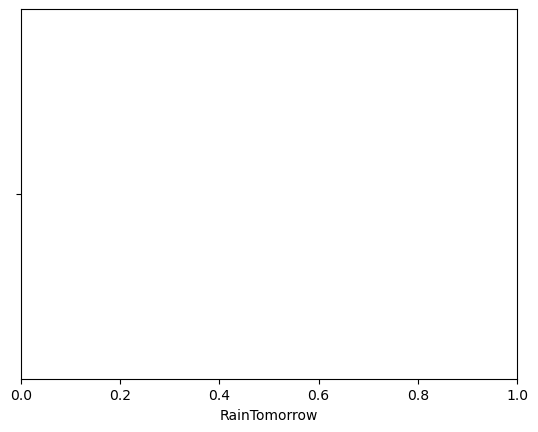

In [ ]:
#box blot
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()
    

<Axes: >

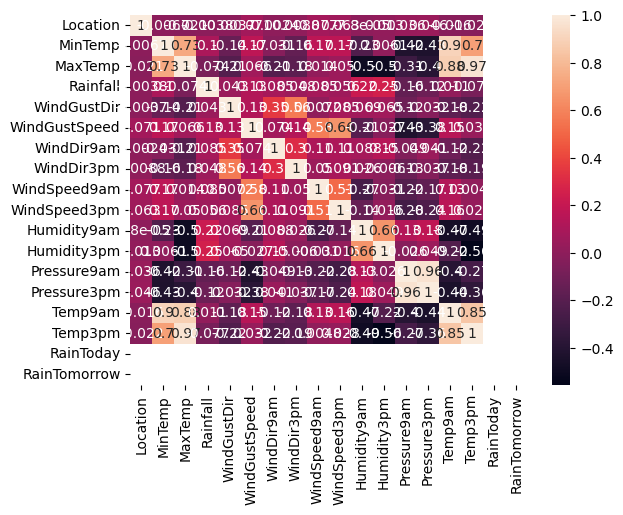

In [ ]:
#heatmap
h=df.select_dtypes(include="number").corr() #to show correlation between numeric data
sns.heatmap(h,annot=True) #annot=True /numbers

In [7]:
columns_to_drop=["Evaporation","Sunshine","Cloud9am","Cloud3pm"]
df.drop(columns=columns_to_drop,inplace=True)

In [8]:
#fill nulls with median to advoid outliers
num_cols = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed',
            'WindSpeed9am','WindSpeed3pm','Humidity9am',
            'Humidity3pm','Pressure9am','Pressure3pm',
            'Temp9am','Temp3pm']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [9]:
#fill nulls with mode (catorigal data)
cat_cols = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
df["Location"].unique() #decode it to numeric

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [13]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [14]:
df["WindDir3pm"].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', 'NE'], dtype=object)

In [15]:
df["WindDir9am"].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [16]:
df["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
#label decoder
label = LabelEncoder()

categorical_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]

for col in categorical_cols:
    df[col] = label.fit_transform(df[col])

In [19]:
#label decoder
label2 = LabelEncoder()

categorical_cols2 = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in categorical_cols2:
    df[col] = label.fit_transform(df[col])

In [20]:
df["RainToday"] = df["RainToday"].map({"No": 0, "Yes": 1})

In [21]:
df["RainTomorrow"] = df["RainTomorrow"].map({"No": 0, "Yes": 1})


In [22]:
df["Date"] = pd.to_datetime(df["Date"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  int64         
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  int64         
 8   WindDir3pm     145460 non-null  int64         
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  